# DefocusTrackerAI: A Generalized Framework for the Automatic Detection of Defocused Particle Images

In this nootebook, we will explore the automatic detection of defocused particle images using machine learning based object detectors -  YOLOv9-m. In particular, how to initiate the python class, process the images and visualize the results.

## Outline:
- [1. Notebook preparation](#1)
  - 1.1 Setup Google Drive (if needed)
  - 1.2 Setup working directory
  - 1.3 Install requirements
- [2. DefocusTrackerAI](#2)
  - [2.1 Initiate DefocusTrackerAI](#2.1)
  - [2.2 Process image set with YOLOv7](#2.2)
  - [2.3 Visualize the detection and tracking results on the image set](#2.3)


<a name="1"></a>

## 1 Notebook preparation

First, let's run the following cells to setup the Google Drive (if needed), the working directory and install the requirements for the DefocusTrackerAI toolbox.

In [1]:
!git clone https://oauth2:@gitlab.com/goncalo.coutinho/defocustrackerAI-main.git

Cloning into 'defocustrackerAI-main'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (441/441), done.
remote: Compressing objects: 100% (435/435), done.
remote: Total 468 (delta 152), reused 0 (delta 0), pack-reused 27 (from 1)
Receiving objects: 100% (468/468), 235.94 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [2]:
cd /content/defocustrackerAI-main

/content/defocustrackerAI-main


In [3]:
import sys
sys.path.append('/content/defocustrackerAI-main/yolov9_main')

In [4]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

<a name="2"></a>

## 2 DefocusTrackerAI

The `DefocusTrackerAI` is a python class that contains the methods to automatically detect defocus particle images and track them in 2D using the SORT algorithm. To start using the toolbox, first we need to import it as shown below: `from my_utils.DefocusTrackerAI import DefocusTrackerAI`.

In [5]:
# Import python class: DefocusTrackerAI
from my_utils.DefocusTrackerAI import DefocusTrackerAI

<a name="2.1"></a>

### 2.1 Initiate DefocusTrackerAI

Once it is imported, we can initiate the `DefocusTrackerAI` providing the directory containing the images to be processed, as shown in the next cell. The processing can be done using the `detect_yolov7` method. Some guidelines follow:  

1. `mytracker` will be an object from the `DefocusTrackerAI` class, which contains its own image set, provided by the image directory, and can call the methos defined in the class, such as `detect_yolov7`.  

2. `detect_yolov7` is an implementation of the object detector YOLOv7 and by default it is initiated with YOLOv7-m model with pre-trained weights on a synthetic dataset containing defocused particle images. As hyper-parameters, it takesm the number of frames that we want to process `N_frames`, the confidence threshold `conf_thres`, the image size `imgsz` and a optional bool type hyper-parameter to enable or disable tracking `enable_tracking`.

3. During processing, a folder named `runs` will be created in the working directory where one can find, within detection and the weights version, a folder with the processed data. It will contain a `.txt` file containing the hyperparameters, a `.csv` file with the detections (fr, id, X, Y, W, H, Cm) and also a folder with `.txt` files containing the detections for each individual frame.

4. If tracking is enabled with `enable_tracking = True`, the `.csv` file containing the tracking data can be found in `runs/tracking`. It uses the same format, however with the `id` corresponding to each individual track.

_**NOTE:** Users can also use one of the other available models in our implementation: YOLOv7-s (lightweight version) and YOLOv7-c (large version) or
provide their own pre-trained weights for one of these models: YOLOv7 -s, -m or -c._

In [6]:
# Directory containing the images to be processed
image_dir = './data-test/synthetic/synthetic_A_min_16px_NS_0100'
# Initiate DefocusTrackerAI
mytracker = DefocusTrackerAI(image_dir)

DefocusTrackerAI-1.0.0 🔍 2025-03-14 Python-3.11.11 torch-2.6.0+cu124 CUDA:No CUDA-enabled GPU found
Working directory: /content/defocustrackerAI-main


<a name="2.2"></a>

### 2.2 Process images with YOLOv9

Now that we are all set, we can process a few frames for testing.

In [22]:
from yolov9_main.models.common import DetectMultiBackend
from yolov9_main.utils.general import non_max_suppression, scale_boxes, xyxy2xywh
from yolov9_main.utils.torch_utils import select_device, smart_inference_mode
from yolov9_main.utils.augmentations import letterbox
from IPython.display import clear_output

In [26]:
my_detections = mytracker.detect_yolov9(weights = './my_models/detect/best_15epochs.pt',
                                        N_frames = 5,
                                        conf_thres = 0.5,
                                        iou_thres = 0.5,
                                        imgsz = 1024
                                    )

YOLO 🚀 2025-3-14 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 588 layers, 32553166 parameters, 0 gradients, 130.7 GFLOPs


Processed image B00001.tif: Detections: 80, inference time: 2688 ms. Time remaining: 0:00:10.754000 (h:m:s).
Processed image B00002.tif: Detections: 80, inference time: 2317 ms. Time remaining: 0:00:07.509000 (h:m:s).
Processed image B00003.tif: Detections: 79, inference time: 2315 ms. Time remaining: 0:00:04.881000 (h:m:s).
Processed image B00004.tif: Detections: 80, inference time: 2283 ms. Time remaining: 0:00:02.401000 (h:m:s).
Processed image B00005.tif: Detections: 80, inference time: 2827 ms. Time remaining: 0:00:00 (h:m:s).
That's it! Elapsed time: 0 hours, 0 mins, 12 secs
Txt files saved to /content/defocustrackerAI-main/runs/detection/my_models/synthetic_A_min_16px_NS_0100_1. CSV also available.


<a name="2.3"></a>

### 2.3 Visualize the detection and tracking results on the image set


Amazing! If you reached this far you were able to process your images using `DefocusTrackerAI`.

Now, to visualize the data, we included the `imageset_viewer` method which takes a `pandas dataframe` (`my_detections`) as input and the number of frames to be showed. In each frame, a bounding box will be drawed if the particle was detected. It will be red if tracking was not enabled, or it will have different colors based on the results from the SORT tracking; the number of track will also be displayed.

_**Note**: If you are not happy with the detection rate perhaps lowering the confidence threshold `conf_thres` will improve the results._

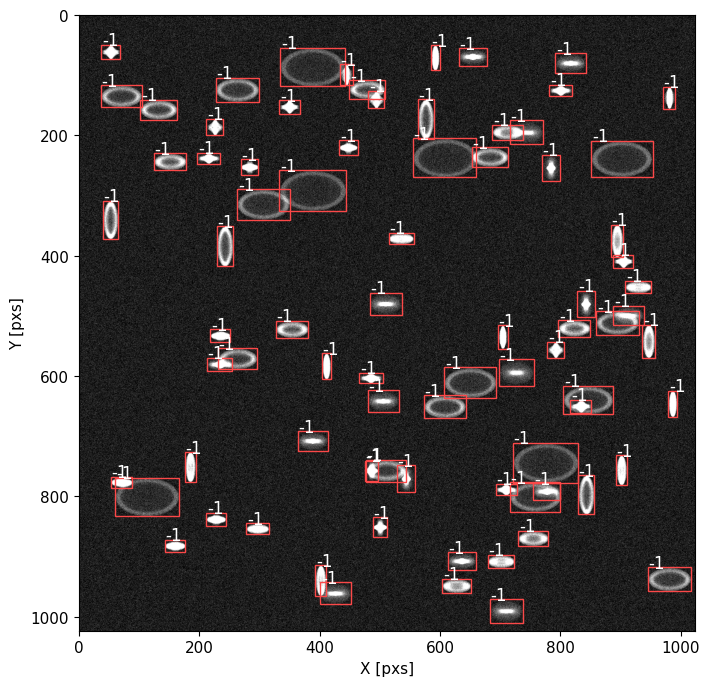

Button(description='Previous', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

IntSlider(value=533, description='Brightness', max=1000, min=1)

In [27]:
%matplotlib inline
mytracker.imageset_viewer(my_detections,
                          n_frames = 5
                          )